# In this notebook, we will be exploring a preprocessing step in which we seek to normalise the target variable.

We will be:
   * **Apply transformations to make the target variable more normally distributed for regression.**
   * **Apply inverse transformations to be able to use these in a regression context.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from helper import (plot_exponential_data, plot_square_normal_data)

import warnings
warnings.simplefilter("ignore")

# Importing the dataset

**Note:** See `helper.py` file included to see how boston data is read in from SciKit Learn. Without it, this below step will throw out an error.

In [2]:
from helper import boston_dataframe
ds = boston_dataframe()

In [3]:
ds.head(15)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [4]:
ds.rename({'MEDV':'Target'}, inplace = True, axis = 1)

# Determining Normality

Making our target variable normally distributed will often lead to better results.

If our target is not normally distributed, we can apply a transformation and then fit our regression to predict the transformed values.

We can inspect whether the target is normally distributed using two methods:

- Visually
- Using a statistical test

# Visually

**Plotting a histogram:**

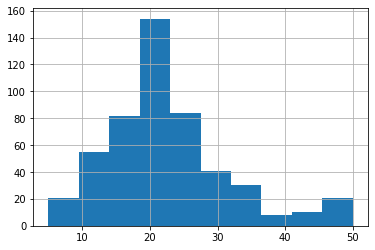

In [5]:
ds['Target'].hist();

Does not look normal due to that right tail. Let's try to verify statistically:

In [6]:
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test

This is a statistical test that tests whether a distribution is normally distributed or not. It isn't perfect, but it is sufficient enough to state that:
- This test outputs a "p-value". The higher this p-value is the closer the distribution is to a normal distribution.
- Frequentist statisticians would say that we will accept that the distribution is normal (more specifically: fail to reject the null hypothesis that it is normal) if p > 0.05.

In [7]:
normaltest(ds.Target.values)

NormaltestResult(statistic=90.9746873700967, pvalue=1.7583188871696095e-20)

From the above we observe that the p-value is extremely low. Therefore we conclude that the y-variable is not normally distributed.

Linear Regression assumes normally distributed residuals which can be aided by transforming y-variable. Let's try some common transformations to try and get y-variable normally distributed. We will try:

- Log
- Square root
- Box cox

# Testing log

The log transform can transform data that is significantly skewed right to be more normally distributed.

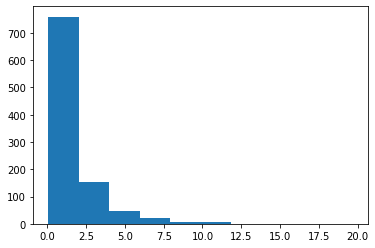

In [8]:
data = plot_exponential_data()

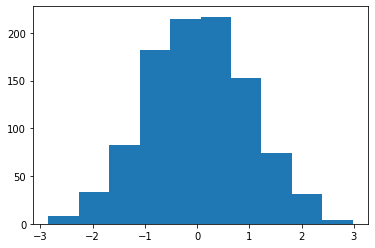

In [9]:
plt.hist(np.log(data));

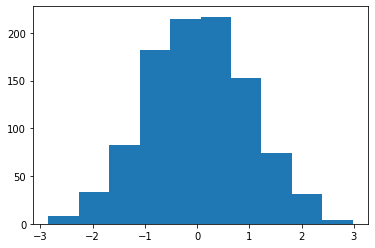

In [10]:
plt.hist(np.log(data));

**Applying the transformation the the dataset**

In [11]:
ds_log = np.log(ds.Target)

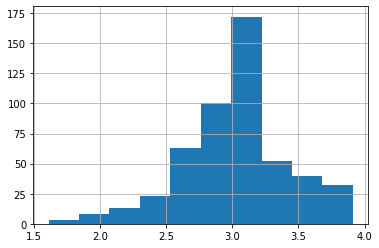

In [12]:
ds_log.hist();

In [13]:
normaltest(ds_log)

NormaltestResult(statistic=17.21801696640698, pvalue=0.00018245472768345196)

**Conclusion:** Although we are closer, the variable still does not follow a normal distribution.

The square root transformation is another transformation that can transform non-normally distributed data into normally distributed data. Let's try this method.

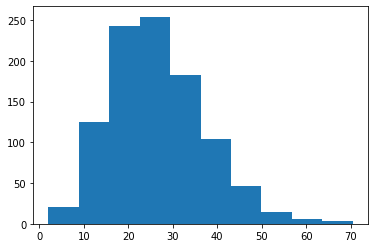

In [14]:
data = plot_square_normal_data()

We observe that the data is slightly right skewed.

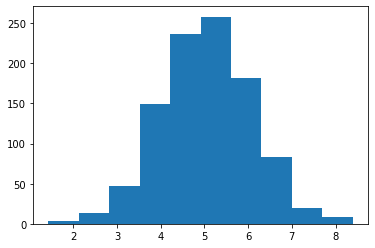

In [15]:
plt.hist(np.sqrt(data));

We will now apply the square root transformation to the target variable of the data set and test whether the result is normally distributed.

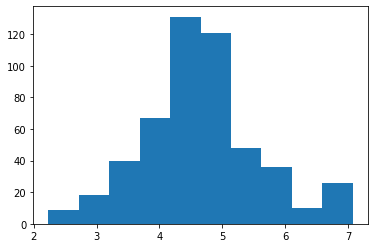

In [16]:
ds_sqrt = np.sqrt(ds.Target)
plt.hist(ds_sqrt);

In [17]:
normaltest(ds_sqrt)

NormaltestResult(statistic=20.487090826863067, pvalue=3.558645701429252e-05)

**Conclusion:** Although we are closer, the variable still does not follow a normal distribution.

# Box cox

The box cox transformation is a parametrised transformation that tries to get distributions "as close to a normal distribution as possible".

It is defined as:

$$ \text{boxcox}(y_i) = \frac{y_i^{\lambda} - 1}{\lambda} $$

We can think of this as a generalisation of the square root function: the square root function uses the exponent of 0.5, but Box Cox lets its exponent vary so it can find the best one.

In [18]:
from scipy.stats import boxcox

In [19]:
boxcox_result = boxcox(ds.Target)
ds_boxcox = boxcox_result[0]
lam = boxcox_result[1]

In [20]:
lam

0.2166209012915364

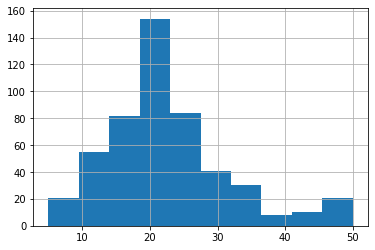

In [21]:
ds.Target.hist();

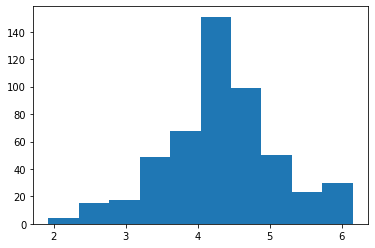

In [22]:
plt.hist(ds_boxcox);

In [23]:
normaltest(ds_boxcox)

NormaltestResult(statistic=4.513528775533045, pvalue=0.1046886692817602)

**Conclusion:** As the p-value is above 0.05, we conclude that the variable is now significantly more normally distributed. This now concludes this preprocessing step.

# Testing regression

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, PolynomialFeatures)

In [25]:
lr = LinearRegression()

**Reloading a clean version of the dataset**

In [26]:
ds = boston_dataframe()

Same steps as before.

**Create X and y**

In [27]:
y_col = "MEDV"

X = ds.drop(y_col, axis=1)
y = ds[y_col]

**Create Polynomial Features**

In [28]:
pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pf.fit_transform(X)

**Splitting the dataset into the training set and test set**

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3, random_state = 72018)

**Feature scaling**

In [30]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

**Applying the Box Cox transformation**

In [31]:
boxcox_result2 = boxcox(y_train)
y_train_boxcox = boxcox_result2[0]
lam2 = boxcox_result2[1]

**Next steps:**

1. Fit regression
1. Transform testing data
1. Predict on testing data

In [32]:
y_train_boxcox.shape

(354,)

In [33]:
lr.fit(X_train, y_train_boxcox)
y_pred_boxcox = lr.predict(X_test)

**Inverse transformation**

Every transformation has an inverse transformation. For example, the inverse transformation of $f(x) = \sqrt{x}$ is $f^{-1}(x) = x^2$. Box Cox has an inverse transformation as well. 

**Note:** We have to utilise the lambda value that we found from before.

In [34]:
from scipy.special import inv_boxcox

In [35]:
boxcox_result = boxcox(ds.MEDV)
ds_boxcox = boxcox_result[0]
lam = boxcox_result[1]

After the transformation, we see that both have the same values now.

In [36]:
# The below code demonstrates the values obtianed after the inverse transformation has been applied to the
# values of the transformed variable. 

inv_boxcox(ds_boxcox, lam)[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [37]:
ds['MEDV'].values[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

**Calculating the $R^2$ using the result of this inverse transformation and `y_test`.**

In [38]:
y_pred = inv_boxcox(y_pred_boxcox, lam2)
r2_score(y_pred, y_test)

0.8794001850404877

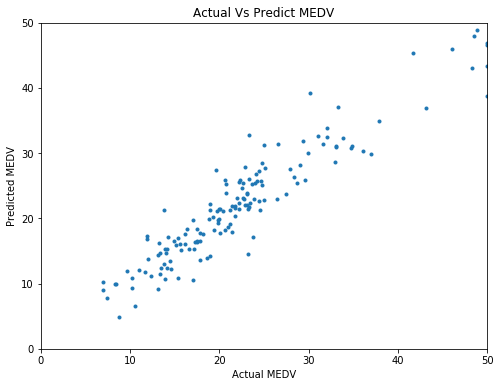

In [39]:
# We observe a clear linear relationship indicating a good model. This is due to the
# predicted and actual values sharing a strong correlation which implies the machine
# learning algorithms have correctly learn't the relationship between the features and 
# target variable. 

f = plt.figure(figsize=(8,6))
ax = plt.axes()
ax.plot(y_test, y_pred, marker='o', ls='', ms=3.0)
lim = (0, y.max())
ax.set(xlabel='Actual MEDV', 
       ylabel='Predicted MEDV', 
       xlim=lim,
       ylim=lim,
       title='Actual Vs Predict MEDV');

**Determine the $R^{2}$ of a LinearRegression without the Box Cox transformation**

As expected, the $R^{2}$ score is lower if we did not use the Box Cox transformation.

In [40]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
r2_score(lr_pred,y_test)

0.8555202098064192